In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plta

C:\Users\omadi\AppData\Local\Temp\ipykernel_9724\2997663163.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv(r'C:\Users\omadi\Desktop\ML\books.csv')
df.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [6]:
df.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [7]:
df.shape

(350, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [9]:
df.isna().sum()

name      0
author    0
rating    0
year      0
genre     0
dtype: int64

In [10]:
df['genre'].unique()

array(['Non Fiction', 'Fiction', 'Childrens'], dtype=object)

# Replace Function To Replace Ctaegorical Data To Numerical Data

In [11]:
df['genre']=df['genre'].replace('Non Fiction',0)
df['genre']=df['genre'].replace('Fiction',1)
df['genre']=df['genre'].replace('Childrens',2)

C:\Users\omadi\AppData\Local\Temp\ipykernel_9724\3665802224.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['genre']=df['genre'].replace('Childrens',2)


In [12]:
df.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,0
1,11/22/63: A Novel,Stephen King,4.6,2011,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,0
3,1984 (Signet Classics),George Orwell,4.7,2017,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,2


# LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
df['name']=lbl_encoder.fit_transform(df['name'])

In [16]:
df.head()

,name,author,rating,year,genre
0,0,114,4.7,2016,0
1,1,218,4.6,2011,1
2,2,133,4.7,2018,0
3,3,95,4.7,2017,1
4,4,173,4.8,2019,2


In [15]:
df['author']=lbl_encoder.fit_transform(df['author'])

# Data Sampling

In [17]:
df['genre'].value_counts()

genre
0    179
1    131
2     40
Name: count, dtype: int64

In [19]:
#Random Sampling
non_fiction = df[df['genre']==0]
fiction = df[df['genre']==1]
children = df[df['genre']==2]
print(non_fiction.shape)
print(fiction.shape)
print(children.shape)


(179, 5)
(131, 5)
(40, 5)


In [20]:
non_fiction_sample=non_fiction.sample(n=40)
fiction_sample=fiction.sample(n=40)

In [21]:
sampled_df = pd.concat([non_fiction_sample,fiction_sample,children],axis=0)

In [22]:
sampled_df.shape

(120, 5)

# Corelation Of Dataframe

In [23]:
X = df.drop('genre',axis=1)
y = df['genre']

In [25]:
print(X.shape)
print(y.shape)

(350, 4)
(350,)


In [26]:
df.corr()

,name,author,rating,year,genre
name,1.000000,0.135285,-0.000824,-0.097172,0.020772
author,0.135285,1.000000,0.034060,-0.168832,-0.010485
rating,-0.000824,0.034060,1.000000,0.220153,0.160181
year,-0.097172,-0.168832,0.220153,1.000000,0.078553
genre,0.020772,-0.010485,0.160181,0.078553,1.000000


In [27]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual info
mutual_info = mutual_info_classif(X,y)
print(mutual_info)

[0.11267137 0.28610183 0.09330704 0.        ]


In [28]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

author    0.286102
name      0.112671
rating    0.093307
year      0.000000
dtype: float64

<Axes: >

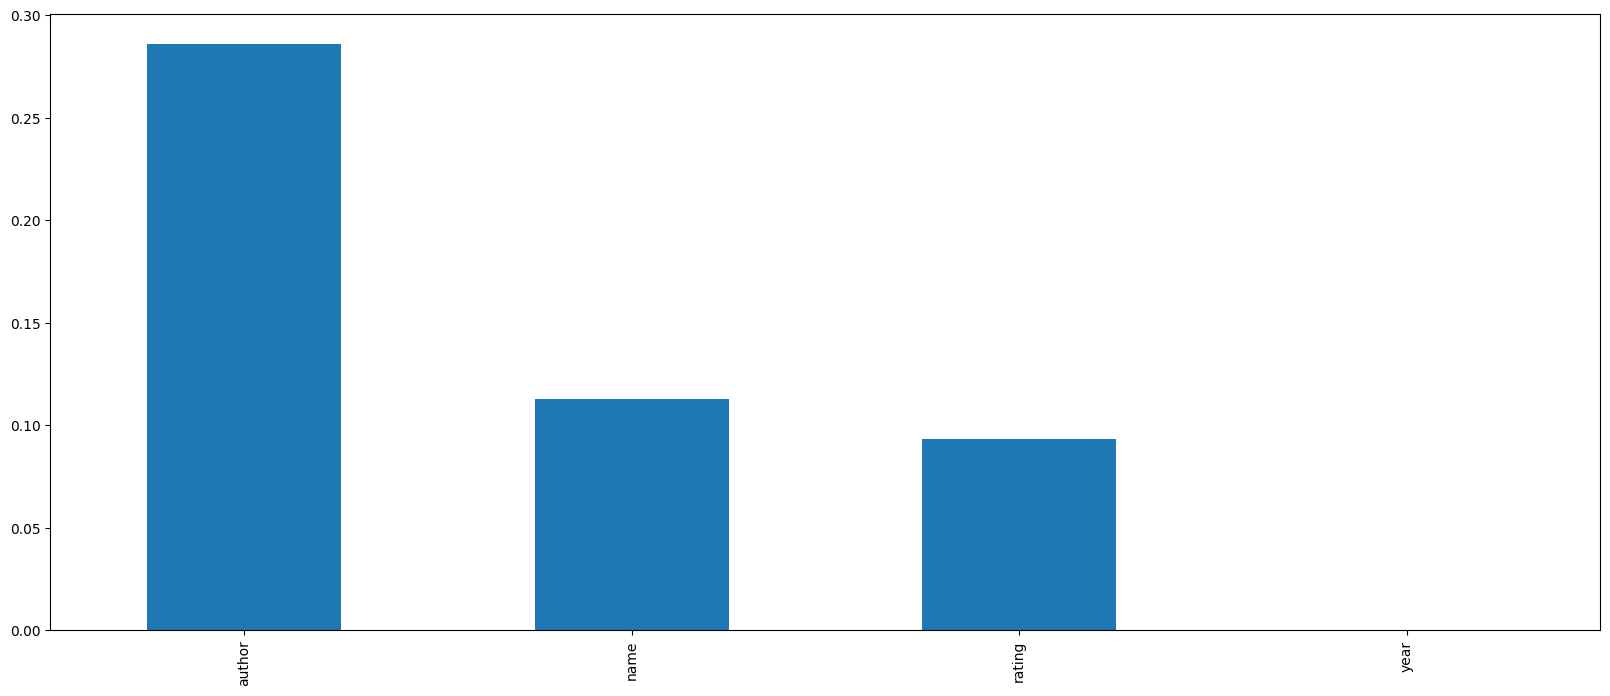

In [29]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [31]:
X = df.drop(['year'],axis=1)

In [32]:
X

,name,author,rating,genre
0,0,114,4.7,0
1,1,218,4.6,1
2,2,133,4.7,0
3,3,95,4.7,1
4,4,173,4.8,2
...,...,...,...,...
345,345,40,4.4,0
346,346,138,4.5,1
347,347,94,4.2,0
348,348,187,4.8,1


# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [34]:
print('X Training : ',X_train.shape)
print('X Testing : ',X_test.shape)
print('y Training : ',y_train.shape)
print('y Testing : ',y_test.shape)

X Training :  (280, 4)
X Testing :  (70, 4)
y Training :  (280,)
y Testing :  (70,)


# Data Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_std = scalar.fit_transform(X_train)
X_test_std = scalar.transform(X_test)


In [37]:
X_train_std

array([[ 4.96256414e-01,  4.36278870e-01, -3.51963910e-02,
         5.46430757e-01],
       [-9.84173874e-01,  1.29823874e+00,  3.93281413e-01,
         5.46430757e-01],
       [-8.64944589e-01,  1.04388993e+00,  3.93281413e-01,
        -9.24728974e-01],
       ...,
       [ 9.23494684e-01, -1.76631121e-03, -8.92151999e-01,
         5.46430757e-01],
       [ 1.69848504e+00,  8.31932582e-01,  8.21759217e-01,
         5.46430757e-01],
       [-7.45715304e-01, -1.78220801e+00,  8.21759217e-01,
         5.46430757e-01]])

# Modelling

In [53]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20,),activation='relu',batch_size=5,verbose=True,max_iter=30,solver='adam')

In [39]:
mlp

MLPClassifier(batch_size=10, hidden_layer_sizes=(8,), max_iter=10, solver='sgd',
              verbose=True)

In [54]:
mlp.fit(X_train_std,y_train)

Iteration 1, loss = 0.99240769
Iteration 2, loss = 0.84185242
Iteration 3, loss = 0.72452079
Iteration 4, loss = 0.62331108
Iteration 5, loss = 0.53406754
Iteration 6, loss = 0.45709847
Iteration 7, loss = 0.39119044
Iteration 8, loss = 0.33667446
Iteration 9, loss = 0.29018180
Iteration 10, loss = 0.25240919
Iteration 11, loss = 0.22046997
Iteration 12, loss = 0.19466300
Iteration 13, loss = 0.17209938
Iteration 14, loss = 0.15284983
Iteration 15, loss = 0.13585535
Iteration 16, loss = 0.12050520
Iteration 17, loss = 0.10643839
Iteration 18, loss = 0.09412396
Iteration 19, loss = 0.08339688
Iteration 20, loss = 0.07418694
Iteration 21, loss = 0.06549606
Iteration 22, loss = 0.05829380
Iteration 23, loss = 0.05199695
Iteration 24, loss = 0.04628625
Iteration 25, loss = 0.04157243
Iteration 26, loss = 0.03735727
Iteration 27, loss = 0.03373679
Iteration 28, loss = 0.03061520
Iteration 29, loss = 0.02766584
Iteration 30, loss = 0.02529563


c:\Users\omadi\anaconda3\envs\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=5, hidden_layer_sizes=(20,), max_iter=30, verbose=True)

In [55]:
mlp.score(X_train_std,y_train)

1.0

In [56]:
mlp.score(X_test_std,y_test)

1.0